In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## SVC

In [2]:
RANDOM_STATE = 2022
dataframe = pd.read_csv('./data/PAMAP2_Extracted_300_25.csv')
dataframe.head(5)

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,...,3.55511,2.92381,8.78856,3.56551,0.010339,0.035223,-0.015202,4.01899,-70.8092,-2.590940
1,0,2.29585,8.67686,3.47059,2.35174,8.62679,3.80806,-0.049142,-0.038741,-0.020873,...,3.43568,2.69787,8.68458,3.68677,0.169545,-0.045680,-0.018241,5.23624,-71.5280,-2.959810
2,0,2.87239,9.23323,2.55365,2.96491,9.14991,2.70393,-0.430040,0.862167,0.438581,...,2.96389,4.31043,7.46421,3.09887,0.213801,0.629110,-0.319256,9.08985,-68.9533,-0.545889
3,0,3.09022,9.35263,3.36474,3.01691,9.21065,3.45878,-0.132352,-0.150542,-0.018884,...,4.43231,2.38958,8.95931,4.39622,-0.462191,0.016133,0.049036,8.32884,-69.3952,-5.055360
4,0,2.87017,8.97734,3.63213,2.97282,9.06021,3.74607,-0.126235,0.030481,-0.038864,...,3.46768,2.18459,8.68819,3.58158,-0.372702,0.114139,-0.001781,15.90850,-69.6117,-5.491680


## entire data

In [3]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE, test_size=0.20)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("train rows: {}, test rows: {}".format(X_train.shape[0], X_test.shape[0]))

train rows: 14655, test rows: 3664


In [4]:
label, count = np.unique(y_train, return_counts=True)
dict(zip(label, count))

{0: 9443, 2: 1917, 3: 1943, 5: 900, 24: 452}

In [6]:
clf = SVC(gamma="auto", random_state=RANDOM_STATE)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.8728


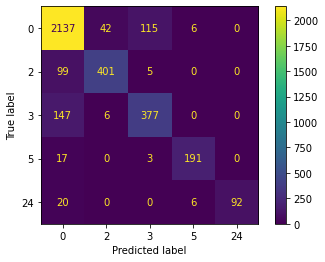

In [7]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [8]:
acc_1_3_cols = []
acc_4_6_cols = []
gyroscope_cols = []
magnetometer_cols = []

for i in range(1, X.shape[1], 12):
    acc_1_3_cols.append(str(i))
    acc_1_3_cols.append(str(i+1))
    acc_1_3_cols.append(str(i+2))

for i in range(4, X.shape[1], 12):
    acc_4_6_cols.append(str(i))
    acc_4_6_cols.append(str(i+1))
    acc_4_6_cols.append(str(i+2))
    
for i in range(7, X.shape[1], 12):
    gyroscope_cols.append(str(i))
    gyroscope_cols.append(str(i+1))
    gyroscope_cols.append(str(i+2))
    
for i in range(10, X.shape[1], 12):
    magnetometer_cols.append(str(i))
    magnetometer_cols.append(str(i+1))
    magnetometer_cols.append(str(i+2))



## Acceleromter +16g


In [9]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_4_6_cols, axis=1)
X = X.drop(gyroscope_cols, axis=1)
X = X.drop(magnetometer_cols, axis=1)

In [10]:
X.head(5)

,1,2,3,13,14,15,25,26,27,37,...,99,109,110,111,121,122,123,133,134,135
0,2.37223,8.60074,3.51048,2.44647,8.97854,3.39485,2.44085,8.93926,3.24095,2.29585,...,3.78335,3.09022,9.35263,3.36474,2.94067,8.82399,3.51824,2.86750,8.97667,3.55511
1,2.29585,8.67686,3.47059,2.35404,9.05064,2.89289,2.79814,9.42351,2.55190,2.87239,...,3.55511,2.87017,8.97734,3.63213,3.12614,9.08677,3.36618,2.55984,8.78830,3.43568
2,2.87239,9.23323,2.55365,2.98622,8.78778,3.74997,2.56947,8.44987,3.78335,3.09022,...,3.43568,2.49844,8.52734,3.89749,2.02838,8.82966,3.35060,4.19693,7.59499,2.96389
3,3.09022,9.35263,3.36474,2.94067,8.82399,3.51824,2.86750,8.97667,3.55511,2.87017,...,2.96389,2.12106,9.17422,3.77419,2.42072,8.60313,3.81909,2.29229,8.79936,4.43231
4,2.87017,8.97734,3.63213,3.12614,9.08677,3.36618,2.55984,8.78830,3.43568,2.49844,...,4.43231,3.38026,7.79446,3.33586,1.38005,10.08290,2.91330,2.06805,8.52686,3.46768


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE, test_size=0.20)

In [15]:
clf = SVC(gamma="auto", random_state=RANDOM_STATE)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.7754


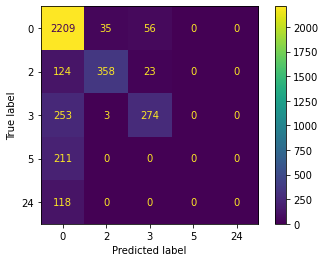

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Acceleromter +6g only

In [17]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(gyroscope_cols, axis=1)
X = X.drop(magnetometer_cols, axis=1)

In [18]:
X.head(5)

,4,5,6,16,17,18,28,29,30,40,...,102,112,113,114,124,125,126,136,137,138
0,2.43954,8.76165,3.35465,2.44295,8.97324,3.55049,2.39825,9.04906,3.53527,2.35174,...,3.85325,3.01691,9.21065,3.45878,2.92116,8.60722,3.43000,2.92381,8.78856,3.56551
1,2.35174,8.62679,3.80806,2.63371,8.88076,3.02198,2.71238,9.43882,2.85456,2.96491,...,3.56551,2.97282,9.06021,3.74607,3.13621,9.10403,3.41359,2.69787,8.68458,3.68677
2,2.96491,9.14991,2.70393,2.80968,9.06169,4.06335,2.62276,8.54936,3.85325,3.01691,...,3.68677,2.42544,8.30922,3.92949,2.26439,9.27655,3.51981,4.31043,7.46421,3.09887
3,3.01691,9.21065,3.45878,2.92116,8.60722,3.43000,2.92381,8.78856,3.56551,2.97282,...,3.09887,2.07163,9.33864,3.83699,2.32450,8.70275,4.07973,2.38958,8.95931,4.39622
4,2.97282,9.06021,3.74607,3.13621,9.10403,3.41359,2.69787,8.68458,3.68677,2.42544,...,4.39622,3.15137,7.42747,3.31154,1.64884,10.17140,2.89935,2.18459,8.68819,3.58158


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE, test_size=0.20)

In [20]:
clf = SVC(gamma="auto", random_state=RANDOM_STATE)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.7778


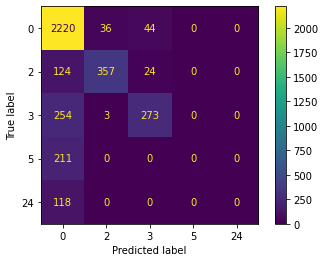

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Gyroscope

In [22]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(acc_4_6_cols, axis=1)
X = X.drop(magnetometer_cols, axis=1)

In [23]:
X.head(5)

,7,8,9,19,20,21,31,32,33,43,...,105,115,116,117,127,128,129,139,140,141
0,-0.092217,0.056812,-0.015845,-0.067544,0.056746,-0.003826,-0.003630,0.015069,-0.009350,-0.049142,...,-0.013520,-0.132352,-0.150542,-0.018884,0.046345,0.006161,0.029452,0.010339,0.035223,-0.015202
1,-0.049142,-0.038741,-0.020873,0.447234,0.004478,-0.014667,0.260938,-0.152669,0.165837,-0.430040,...,-0.015202,-0.126235,0.030481,-0.038864,-0.268035,0.023673,-0.013361,0.169545,-0.045680,-0.018241
2,-0.430040,0.862167,0.438581,0.055655,0.046364,-0.004223,-0.074168,0.069739,-0.013520,-0.132352,...,-0.018241,0.093767,-0.379835,-0.017484,-0.143147,-0.633642,0.147539,0.213801,0.629110,-0.319256
3,-0.132352,-0.150542,-0.018884,0.046345,0.006161,0.029452,0.010339,0.035223,-0.015202,-0.126235,...,-0.319256,-0.298830,0.296816,0.144626,-0.181655,0.116403,0.078498,-0.462191,0.016133,0.049036
4,-0.126235,0.030481,-0.038864,-0.268035,0.023673,-0.013361,0.169545,-0.045680,-0.018241,0.093767,...,0.049036,-0.107140,-0.773690,-0.219161,0.441511,0.245951,-0.288542,-0.372702,0.114139,-0.001781


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE, test_size=0.20)

In [25]:
clf = SVC(gamma="auto", random_state=RANDOM_STATE)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.6763


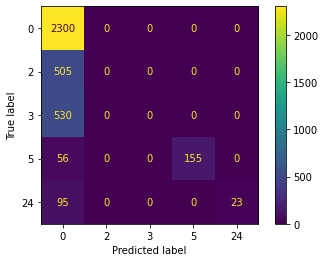

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Magnetometr

In [27]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(acc_4_6_cols, axis=1)
X = X.drop(gyroscope_cols, axis=1)

In [28]:
X.head(5)

,10,11,12,22,23,24,34,35,36,46,...,108,118,119,120,130,131,132,142,143,144
0,14.68060,-69.2128,-5.589050,15.80040,-68.8438,-5.48217,15.34500,-68.8115,-5.93952,14.65590,...,-3.861670,3.88699,-71.7704,-3.40988,4.00819,-71.6745,-2.94732,4.01899,-70.8092,-2.590940
1,14.65590,-69.0862,-6.860420,15.18320,-68.9511,-2.81450,14.27660,-69.1802,2.16975,6.74787,...,-2.590940,4.89423,-71.6125,-3.30399,4.43299,-71.3578,-4.10606,5.23624,-71.5280,-2.959810
2,6.74787,-71.2189,0.035156,3.34363,-71.0935,-2.81772,2.87338,-71.8146,-3.86167,3.88699,...,-2.959810,5.22709,-71.5215,-3.42255,5.04520,-70.0100,-1.66824,9.08985,-68.9533,-0.545889
3,3.88699,-71.7704,-3.409880,4.00819,-71.6745,-2.94732,4.01899,-70.8092,-2.59094,4.89423,...,-0.545889,10.16170,-69.5325,-2.64752,9.70210,-69.9337,-3.22523,8.32884,-69.3952,-5.055360
4,4.89423,-71.6125,-3.303990,4.43299,-71.3578,-4.10606,5.23624,-71.5280,-2.95981,5.22709,...,-5.055360,9.21699,-69.8803,-5.18649,14.56610,-68.3312,-5.92542,15.90850,-69.6117,-5.491680


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE, test_size=0.20)

In [30]:
clf = SVC(gamma="auto", random_state=RANDOM_STATE)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.8021


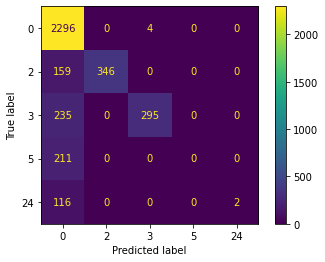

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Acceleromter (+6g) + Magnetometr

In [32]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(gyroscope_cols, axis=1)

In [33]:
X.head(5)

,4,5,6,10,11,12,16,17,18,22,...,126,130,131,132,136,137,138,142,143,144
0,2.43954,8.76165,3.35465,14.68060,-69.2128,-5.589050,2.44295,8.97324,3.55049,15.80040,...,3.43000,4.00819,-71.6745,-2.94732,2.92381,8.78856,3.56551,4.01899,-70.8092,-2.590940
1,2.35174,8.62679,3.80806,14.65590,-69.0862,-6.860420,2.63371,8.88076,3.02198,15.18320,...,3.41359,4.43299,-71.3578,-4.10606,2.69787,8.68458,3.68677,5.23624,-71.5280,-2.959810
2,2.96491,9.14991,2.70393,6.74787,-71.2189,0.035156,2.80968,9.06169,4.06335,3.34363,...,3.51981,5.04520,-70.0100,-1.66824,4.31043,7.46421,3.09887,9.08985,-68.9533,-0.545889
3,3.01691,9.21065,3.45878,3.88699,-71.7704,-3.409880,2.92116,8.60722,3.43000,4.00819,...,4.07973,9.70210,-69.9337,-3.22523,2.38958,8.95931,4.39622,8.32884,-69.3952,-5.055360
4,2.97282,9.06021,3.74607,4.89423,-71.6125,-3.303990,3.13621,9.10403,3.41359,4.43299,...,2.89935,14.56610,-68.3312,-5.92542,2.18459,8.68819,3.58158,15.90850,-69.6117,-5.491680


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE, test_size=0.20)

In [35]:
clf = SVC(gamma="auto", random_state=RANDOM_STATE)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.8174


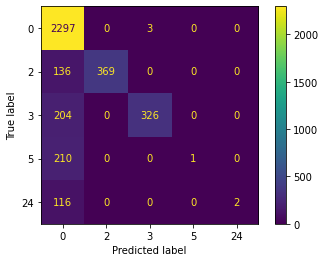

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Acceleromter (+6g) + Gyroscope

In [37]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(magnetometer_cols, axis=1)

In [38]:
X.head(5)

,4,5,6,7,8,9,16,17,18,19,...,126,127,128,129,136,137,138,139,140,141
0,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,2.44295,8.97324,3.55049,-0.067544,...,3.43000,0.046345,0.006161,0.029452,2.92381,8.78856,3.56551,0.010339,0.035223,-0.015202
1,2.35174,8.62679,3.80806,-0.049142,-0.038741,-0.020873,2.63371,8.88076,3.02198,0.447234,...,3.41359,-0.268035,0.023673,-0.013361,2.69787,8.68458,3.68677,0.169545,-0.045680,-0.018241
2,2.96491,9.14991,2.70393,-0.430040,0.862167,0.438581,2.80968,9.06169,4.06335,0.055655,...,3.51981,-0.143147,-0.633642,0.147539,4.31043,7.46421,3.09887,0.213801,0.629110,-0.319256
3,3.01691,9.21065,3.45878,-0.132352,-0.150542,-0.018884,2.92116,8.60722,3.43000,0.046345,...,4.07973,-0.181655,0.116403,0.078498,2.38958,8.95931,4.39622,-0.462191,0.016133,0.049036
4,2.97282,9.06021,3.74607,-0.126235,0.030481,-0.038864,3.13621,9.10403,3.41359,-0.268035,...,2.89935,0.441511,0.245951,-0.288542,2.18459,8.68819,3.58158,-0.372702,0.114139,-0.001781


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE, test_size=0.20)

In [40]:
clf = SVC(gamma="auto", random_state=RANDOM_STATE)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.7781


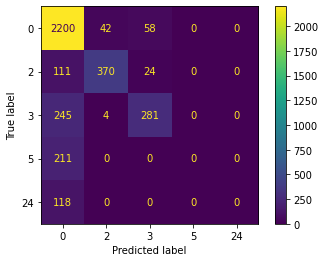

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Gyroscope + Magnetometr

In [42]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(acc_4_6_cols, axis=1)

In [43]:
X.head(5)

,7,8,9,10,11,12,19,20,21,22,...,129,130,131,132,139,140,141,142,143,144
0,-0.092217,0.056812,-0.015845,14.68060,-69.2128,-5.589050,-0.067544,0.056746,-0.003826,15.80040,...,0.029452,4.00819,-71.6745,-2.94732,0.010339,0.035223,-0.015202,4.01899,-70.8092,-2.590940
1,-0.049142,-0.038741,-0.020873,14.65590,-69.0862,-6.860420,0.447234,0.004478,-0.014667,15.18320,...,-0.013361,4.43299,-71.3578,-4.10606,0.169545,-0.045680,-0.018241,5.23624,-71.5280,-2.959810
2,-0.430040,0.862167,0.438581,6.74787,-71.2189,0.035156,0.055655,0.046364,-0.004223,3.34363,...,0.147539,5.04520,-70.0100,-1.66824,0.213801,0.629110,-0.319256,9.08985,-68.9533,-0.545889
3,-0.132352,-0.150542,-0.018884,3.88699,-71.7704,-3.409880,0.046345,0.006161,0.029452,4.00819,...,0.078498,9.70210,-69.9337,-3.22523,-0.462191,0.016133,0.049036,8.32884,-69.3952,-5.055360
4,-0.126235,0.030481,-0.038864,4.89423,-71.6125,-3.303990,-0.268035,0.023673,-0.013361,4.43299,...,-0.288542,14.56610,-68.3312,-5.92542,-0.372702,0.114139,-0.001781,15.90850,-69.6117,-5.491680


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE, test_size=0.20)

In [45]:
clf = SVC(gamma="auto", random_state=RANDOM_STATE)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.8193


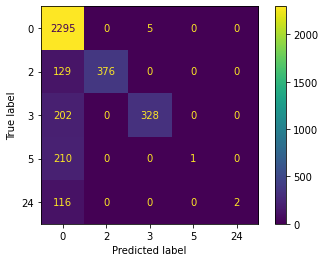

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)